### 데이터 그룹연산 - Group by

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
'''
groupby는 통계자료에서 굉장히 많이 사용한다.
그룹핑 시켜서 데이터의 합을 구하거나 평균치를 구하거나...등등
'''

'\ngroupby는 통계자료에서 굉장히 많이 사용한다.\n그룹핑 시켜서 데이터의 합을 구하거나 평균치를 구하거나...등등\n'

In [3]:
np.random.seed(100)
df1 = DataFrame({
    'Gender':['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female'],
    'Smoking':['Smoker', 'Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'],
    'CountA':np.random.randint(1,10, 8),
    'CountB':np.random.randint(1,10, 8)
})
df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [4]:
# groupby함수로 데이터를 그룹핑하면 DataFrameGroupBy  객체가 리턴된다. 이 상태로는 아무것도 못함
df1.groupby('Gender')

In [5]:
# groupby 함수로 그룹핑을 했으면 반드시 통게함수를 적용시켜야 한다.
# Smoking은 Numeric한 컬럼이 아니라서 sum() 함수의 적용을 받지 못한다. 숫자에만 적용
df1.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,29,25
Male,18,7


In [6]:
df1.groupby('Gender').max() #숫자, 문자 모두 적용됨.

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,9,3


In [7]:
# 그룹핑할 때 2개 이상 컬럼 가능... 성별.. 흡연여부로 그룹핑...
df1.groupby(['Gender', 'Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      11
       Smoker          16      14
Male   Non-Smoker       9       4
       Smoker           9       3

In [8]:
df1.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,29,25
Male,18,7


In [9]:
df1.groupby('Gender')['CountA'].sum() # 하나의 컬럼이므로 시리즈로 반환. 그래서 모양이 이런 것.

Gender
Female    29
Male      18
Name: CountA, dtype: int32

In [10]:
df1.groupby('Gender')['CountA'].agg('sum') # aggregation = 집합. sum도 쓸 수 있고 함수 여러개를 쓸 수 있음

Gender
Female    29
Male      18
Name: CountA, dtype: int32

In [11]:
df1.groupby('Gender')[['CountA']].sum() # 이렇게 하면 2차원이 돼서 모양 예쁘게 됨
df1.groupby('Gender')['CountA'].agg(['sum']) # 위와 같음

,sum
Gender,
Female,29
Male,18


In [12]:
# agg는 aggregation이라는 뜻으로 여러개의 함수를 동시에 사용해서 그룹할 수 있다.
df1.groupby('Gender')['CountA'].agg(['sum','mean','count']) #count는 데이터의 개수

,sum,mean,count
Gender,,,
Female,29,5.8,5
Male,18,6.0,3


### 실전데이터 응용하기

In [13]:
tipdf = pd.read_csv("../data/tips.csv")
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [14]:
# 날짜별로 그룹핑하고 count()를 적용
tipdf.groupby('day').count() # 지금 나온 데이터는 아무런 의미가 없다.

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [15]:
# 1. day라는 컬럼을 기준으로 그룹핑해서 요일별 팁의 평균
tipdf.groupby('day')[['tip']].mean()
tipdf.groupby('day')['tip'].agg(['mean'])

,mean
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


In [16]:
# 2. 
tip_group = tipdf.groupby('day')
tip_group['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [17]:
# 3.
tip_group['tip'].mean().sort_values(ascending=False)

day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64

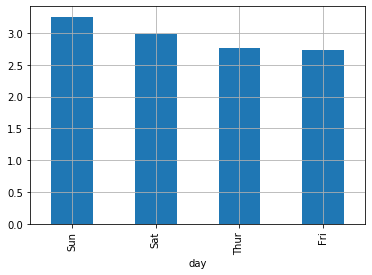

In [18]:
#4. 시각화
tip_group['tip'].mean().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.show()

In [19]:
# 이중으로 그룹핑 가능하다..(성별로 그룹핑 하고 나중에 다시 흡연/비흡연으로 그룹핑)
tip_group2 = tipdf.groupby(by=['sex','smoker'])
tip_group2.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

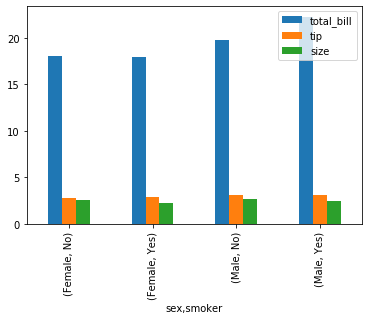

In [20]:
tip_group2.mean().plot(kind='bar')
plt.show()

### 알아두어야 할 함수들

In [21]:
'''
1. unique()
중복된 것은 걸러버리고 중복되지 않은 값만 출력
SQL에서 distinct와 동일한 기능
'''
df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [22]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
'''
2. describe()
데이터에 대한 간단한 설명... 
간단한 통계 자료를 내준다.
숫자로서 가능한 데이터만 출력
'''
df1.describe() #Numeric한 값만 나옴.

,CountA,CountB
count,8.000000,8.00000
mean,5.875000,4.00000
std,3.044316,2.56348
min,1.000000,1.00000
25%,3.750000,2.75000
50%,6.500000,3.00000
75%,8.250000,5.25000
max,9.000000,9.00000


In [24]:
df1.info() #위와 다름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   8 non-null      object
 1   Smoking  8 non-null      object
 2   CountA   8 non-null      int32 
 3   CountB   8 non-null      int32 
dtypes: int32(2), object(2)
memory usage: 320.0+ bytes


In [25]:
'''
3. sum().... 숫자 데이터에만 적용... mean(
4. count().... 값의 개수를 리턴
5. value_counts().... 각각 해당 컬럼에서 그 값이 몇번 나왔는지 확인할 때 사용
'''
print(df1.groupby('Gender').sum())
print(df1.groupby('Smoking').count())
df1['Smoking'].value_counts() #지금은 개수가 같아서 count()와 같이 나오는데 원래는 다름

        CountA  CountB
Gender                
Female      29      25
Male        18       7
            Gender  CountA  CountB
Smoking                           
Non-Smoker       4       4       4
Smoker           4       4       4


Non-Smoker    4
Smoker        4
Name: Smoking, dtype: int64

In [26]:
'''
6. apply
판다스에서 내가 만들어서 함수를 작성... 그걸 적용시킬 때 사용하는 함수
판다스에서 제공하지 않는 함수를 내가 만들어서 적용하려면 사용
'''
def plus(x):
    return x + 1001

df1['CountA'].apply(plus) #함수명을 문자열처럼 쓰면 안 됨

0    1010
1    1010
2    1005
3    1009
4    1009
5    1002
6    1006
7    1004
Name: CountA, dtype: int64

In [27]:
df1['CountA'].agg(plus) #위와 같음

0    1010
1    1010
2    1005
3    1009
4    1009
5    1002
6    1006
7    1004
Name: CountA, dtype: int64

In [28]:
'''
7. 
컬럼 확인 |
'''
print(df1.columns)
print('*'*30)
print(df1.info()) #좀 더 디테일하게 컬럼 확인
print('*'*30)
print(df1.index) #인덱스 확인

Index(['Gender', 'Smoking', 'CountA', 'CountB'], dtype='object')
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   8 non-null      object
 1   Smoking  8 non-null      object
 2   CountA   8 non-null      int32 
 3   CountB   8 non-null      int32 
dtypes: int32(2), object(2)
memory usage: 320.0+ bytes
None
******************************
RangeIndex(start=0, stop=8, step=1)


In [29]:
df1.columns = ['가','나','다','라']
df1

,가,나,다,라
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


### Pivot Tables

In [30]:
'''
pivot_table 함수를 사용해서
DataFrame의 데이터를 Reshape 한다.

df2.pivot_table?
aggfunc="mean" -> 디폴트 통계함수는 평균
'''

'\npivot_table 함수를 사용해서\nDataFrame의 데이터를 Reshape 한다.\n\ndf2.pivot_table?\naggfunc="mean" -> 디폴트 통계함수는 평균\n'

In [31]:
data = {
    "도시":["서울","서울","서울","부산","부산","부산","인천","인천"],
    "연도":["2015","2010","2005","2015","2010","2005","2015","2010"],
    "인구":[990431,963148,976254,344875,333231,300231,289056,257812],
    "지역":["수도권","수도권","수도권","경상권","경상권","경상권","수도권","수도권"]
}
df2 = DataFrame(data)
df2

,도시,연도,인구,지역
0,서울,2015,990431,수도권
1,서울,2010,963148,수도권
2,서울,2005,976254,수도권
3,부산,2015,344875,경상권
4,부산,2010,333231,경상권
5,부산,2005,300231,경상권
6,인천,2015,289056,수도권
7,인천,2010,257812,수도권


In [32]:
df2.pivot_table(values=['인구'],index=['도시'],columns=['연도'])
df2.pivot_table('인구',index='도시',columns='연도') # 이렇게 써도 됨

연도,2005,2010,2015
도시,,,
부산,300231.0,333231.0,344875.0
서울,976254.0,963148.0,990431.0
인천,NaN,257812.0,289056.0


In [33]:
df2.pivot_table('인구',index='도시',columns='연도', margins=True) #margins 쓰면 전체 값 같이 나옴

연도,2005,2010,2015,All
도시,,,,
부산,300231.0,333231.000000,344875.0,326112.333333
서울,976254.0,963148.000000,990431.0,976611.000000
인천,NaN,257812.000000,289056.0,273434.000000
All,638242.5,518063.666667,541454.0,556879.750000


In [34]:
df2['인구'].mean()

556879.75

In [35]:
df2.pivot_table(['인구'],index=['연도','도시'])

인구
연도   도시        
2005 부산  300231
     서울  976254
2010 부산  333231
     서울  963148
     인천  257812
2015 부산  344875
     서울  990431
     인천  289056

### 실전데이터 Pivot_Table 응용

In [36]:
tipdf=pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [37]:
'''
분석의 목표는 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지를 알고 싶다
우선 식사대금과 팁의 비율을 나타내는 컬럼을 하나 추가
tip_pct
'''

'\n분석의 목표는 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지를 알고 싶다\n우선 식사대금과 팁의 비율을 나타내는 컬럼을 하나 추가\ntip_pct\n'

In [38]:
tipdf['tip_pct'] = tipdf['tip']/tipdf['total_bill']
tipdf.dropna(inplace=True)
tipdf.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3.0,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2.0,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2.0,0.159744


In [39]:
tipdf.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [40]:
tipdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
 7   tip_pct     244 non-null    float64
dtypes: float64(4), object(4)
memory usage: 17.2+ KB


In [41]:
tipdf.pivot_table(index='day', aggfunc='mean').round(2) #소수점 셋째자리에서 반올림이 일어남

,size,tip,tip_pct,total_bill
day,,,,
Fri,2.11,2.73,0.17,17.15
Sat,2.52,2.99,0.15,20.44
Sun,2.84,3.26,0.17,21.41
Thur,2.45,2.77,0.16,17.68


In [42]:
tipdf.pivot_table(index=['sex','smoker']).round(2) # aggfunc='mean'은 디폴트

size   tip  tip_pct  total_bill
sex    smoker                                 
Female No      2.59  2.77     0.16       18.11
       Yes     2.24  2.93     0.18       17.98
Male   No      2.71  3.11     0.16       19.79
       Yes     2.50  3.05     0.15       22.28

In [43]:
#tipdf.pivot_table(values, index=, columns=)
'''
피벗테이블은 데이터프레임을 reshape하는데,
index : 그룹핑 기준 (인덱스를 하나로 줘도 되고, 여러개로 줘도 됨)
columns : 컬럼값
values : index와 columns 사이의 필드를 채우는 값
'''
tipdf.pivot_table(values=['total_bill','tip'], index=['sex','day'], columns='smoker')

tip           total_bill           
smoker             No       Yes         No        Yes
sex    day                                           
Female Fri   3.125000  2.682857  19.365000  12.654286
       Sat   2.724615  2.868667  19.003846  20.266667
       Sun   3.329286  3.500000  20.824286  16.540000
       Thur  2.459600  2.990000  16.014400  19.218571
Male   Fri   2.500000  2.741250  17.475000  20.452500
       Sat   3.256563  2.879259  19.929063  21.837778
       Sun   3.115349  3.521333  20.403256  26.141333
       Thur  2.941500  3.058000  18.486500  19.171000

In [44]:
# tip을 알고 싶다... 성별로 그룹핑, 컬럼은 흡연 여부... count(), 마진
tipdf.pivot_table('tip', index='sex', columns='smoker', aggfunc='count', margins=True)
tipdf.pivot_table('tip', 'sex', 'smoker', aggfunc='count', margins=True) 
#value, index, columns 기본적인 순서이므로 위와 같이 적어도 된다.

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


#### 문제1
    -성별에 따른 평균 팁비율

In [45]:
# 1. pivot_table로 나타내기
tipdf.pivot_table('tip_pct', 'sex')

,tip_pct
sex,
Female,0.166491
Male,0.157651


In [46]:
# 2. groupby로 나타내기
tipdf.groupby('sex')[['tip_pct']].mean()
tipdf.groupby('sex')['tip_pct'].agg(['mean'])

,mean
sex,
Female,0.166491
Male,0.157651


### 문제 2
    - 성별과 흡연 여부에 따른 평균팁비율 (pivot_table, groupby, mean, agg, aggfunc 모두 사용)

In [47]:
tipdf.pivot_table('tip_pct', ['sex','smoker'], aggfunc='mean')

tip_pct
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

In [48]:
tipdf.pivot_table('tip_pct', index=['sex','smoker'])

tip_pct
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

In [49]:
tipdf.pivot_table('tip_pct', ['sex','smoker'])

tip_pct
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

In [50]:
tipdf.groupby(['sex', 'smoker'])[['tip_pct']].mean()

tip_pct
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

In [51]:
tipdf.groupby(by=['sex', 'smoker'])['tip_pct'].agg(['mean'])

mean
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

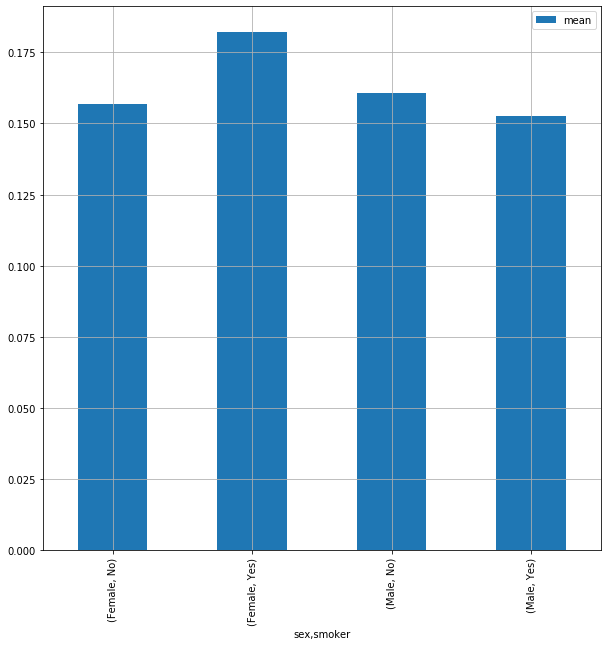

In [52]:
tipdf.groupby(['sex', 'smoker'])['tip_pct'].agg(['mean']).plot(kind='bar', grid=True, figsize=(10,10))
plt.show()

In [53]:
'''
사용자함수 정의
각각의 그룹에서 가장 많은 팁과 가장 적은 팁의 차이를 알고 싶다
'''
def max_min_tip(x):
    return x.max() - x.min()

In [54]:
#내장함수가 아닌 사용자 정의 함수는 문자열로 넣으면 안 됨
tipdf.groupby(by=['sex', 'smoker'])[['tip']].agg(max_min_tip)

tip
sex    smoker      
Female No      4.20
       Yes     5.50
Male   No      7.75
       Yes     9.00